<a href="https://colab.research.google.com/github/NovaMaja/python/blob/master/Pandas_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro to Pandas

First we will import Pandas with the conventional alias pd:

In [0]:
import pandas as pd

##Serie and DataFrame
__Serie__ and __DataFrame__ are two fundamental components of Pandas. A __DataFrame__ is a way to organize your data, and consists of one or more __Series__. You can think of a **DataFrame** as a table, and a **Serie** as one column of that table. 

###Create DataFrame from scratch
We can create a Pandas **DataFrame** from a regular Python Dictionary. A python Dictionary is a collection of key - value pairs. You can look up a value using the key as the index. Let us first create a small dictionary:


In [0]:
project_work_hours = {
    'prototype' : [150, 75, 25],
    'design' : [0, 75, 25],
    'administration' : [0, 0, 75],
}

This dictionary shows how many hours each member of the project team spent on prototyping, design, and administration of a project. The first employee spent all her time on the prototype. The second both worked on design and prototype, while the third was mostly focused on administration.

We can get a list of all the hours spent on the prototype phase like this:

In [0]:
project_work_hours['prototype']

[150, 75, 25]

It is easier to work with this data if it is in a Pandas *DataFrame*. To convert it we simply do:

In [0]:
hours = pd.DataFrame(project_work_hours)
hours

,prototype,design,administration
0,150,0,0
1,75,75,0
2,25,25,75


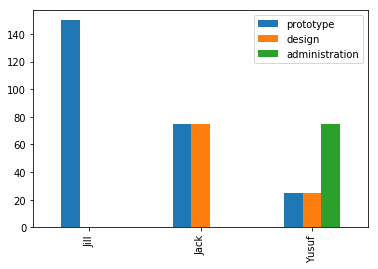

In [0]:
hours.plot( kind= 'bar');

###Plots
one neat trick in Pandas is that you can make matplotlib plots out of the box using pandas.DataFrame.plot()




Notice that the keys in the dictionary became the header names, and the values became the columns.

###Create custom index
The default index of a Pandas **DataFrame** is a range of numbers starting at 0. We can change this to whatever we want. In our case it would make sense to use the name of the team memebers.

In [0]:
hours = pd.DataFrame(project_work_hours, index = ['Jill', 'Jack', 'Yusuf'])
hours

,prototype,design,administration
Jill,150,0,0
Jack,75,75,0
Yusuf,25,25,75


###Pandas and Numpy
Pandas is built on Numpy, and gives us access to the same numerical operations. So if we for example want to know the total hours spent on each phase of the project we can find it using the numpy function *sum()*

In [0]:
hours.sum()

prototype         250
design            100
administration     75
dtype: int64

##Load CSV files
Most of the time we use pandas to work with data from some external source, often a csv file. We can load csv files directly into a Pandas *DataFrame* with the function *read_csv()*. *read_csv()* can read a file from your local file system, or even grab it directly from a url. We will grab a table of popular baby names in New York that we found using https://catalog.data.gov/   

In [0]:
baby_names = pd.read_csv('https://data.cityofnewyork.us/api/views/25th-nujf/rows.csv?accessType=DOWNLOAD')

to get an idea of how the data looks like we ca take a peak at the first few rows:

In [0]:
baby_names.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Olivia,172,1
1,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Chloe,112,2
2,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Sophia,104,3
3,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Emily,99,4
4,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Emma,99,4


... or the last few rows:

In [0]:
baby_names.tail()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
19413,2011,MALE,WHITE NON HISPANIC,STEPHEN,10,97
19414,2011,MALE,WHITE NON HISPANIC,STEPHEN,10,97
19415,2011,MALE,WHITE NON HISPANIC,DEREK,10,97
19416,2011,MALE,WHITE NON HISPANIC,BENNETT,10,97
19417,2011,MALE,WHITE NON HISPANIC,ELLIS,10,97


... or even a number of random rows:

In [0]:
baby_names.sample(10)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
10673,2013,MALE,HISPANIC,Kaiden,33,72
12448,2012,FEMALE,HISPANIC,VANESSA,44,45
7615,2014,MALE,WHITE NON HISPANIC,Dean,19,93
18567,2011,MALE,HISPANIC,MOISES,18,86
8410,2013,FEMALE,BLACK NON HISPANIC,Amber,16,41
6183,2014,MALE,ASIAN AND PACIFIC ISLANDER,Allen,26,42
5462,2014,FEMALE,WHITE NON HISPANIC,Aria,45,51
11426,2013,MALE,WHITE NON HISPANIC,Joel,18,92
450,2016,FEMALE,HISPANIC,Aylin,27,57
5753,2014,FEMALE,WHITE NON HISPANIC,Goldy,17,79


We can get some useful information about the dataset with *info()*

In [0]:
baby_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19418 entries, 0 to 19417
Data columns (total 6 columns):
Year of Birth         19418 non-null int64
Gender                19418 non-null object
Ethnicity             19418 non-null object
Child's First Name    19418 non-null object
Count                 19418 non-null int64
Rank                  19418 non-null int64
dtypes: int64(3), object(3)
memory usage: 910.3+ KB


And we can get some descriptive statistics with *describe()*

In [0]:
baby_names.describe()

,Year of Birth,Count,Rank
count,19418.000000,19418.000000,19418.000000
mean,2013.124318,33.520084,57.497116
std,1.599749,38.243201,25.363693
min,2011.000000,10.000000,1.000000
25%,2012.000000,13.000000,38.000000
50%,2013.000000,20.000000,59.000000
75%,2014.000000,36.000000,78.000000
max,2016.000000,426.000000,102.000000


###Changing the column names
Some of the column names are a little bit hard to work with because they contain quotes and spaces. We can change it, but let us first print out the column names as they are:

In [0]:
baby_names.columns

Index(['Year of Birth', 'Gender', 'Ethnicity', 'Child's First Name', 'Count',
       'Rank'],
      dtype='object')

Now let us change them to make them all lower case, and with no spaces or strange characters:

In [0]:
baby_names.columns = ['birth_year', 'gender', 'ethnicity', 'first_name', 'count', 'rank' ]

If we now take a look at a couple of rows of the DataFrame we see the column names have changed:

In [0]:
baby_names.head(2)

,birth_year,gender,ethnicity,first_name,count,rank
0,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Olivia,172,1
1,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Chloe,112,2


we can also change just a few of the column names using the dictionary format:

In [0]:
baby_names.rename(columns={
    'first_name' : 'name',
    'birth_year' : 'year'
}, inplace=True)

`inplace=True` makes sure the changes are applied to the baby_names DataFrame itself in stead of returning a copy. If we do not set `inplace=True` we would have to write: 

```
baby_names = baby_names.rename(columns={
    'first_name' : 'name',
    'birth_year' : 'year'
})
```



now let us look at the **DataFrame** again

In [0]:
baby_names.head()

,year,gender,ethnicity,name,count,rank
0,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Olivia,172,1
1,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Chloe,112,2
2,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Sophia,104,3
3,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Emily,99,4
4,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Emma,99,4


##Cleaning data
When working with real world data we often have incomplete or poorly formatted datasets. Pandas gives us a lot of tools to clean the data so it is ready for analysis. In this particular dataset there are a lot of duplicate entries. We can remove them using *drop_duplicates()* Before we do that, let us check how many entries we have in total:

In [0]:
baby_names.shape

(19418, 6)

Now we will drop the duplicates. we can use inplace=True like before to make sure we are working on the base DataFrame and not a new copy.

In [0]:
baby_names.drop_duplicates(inplace = True)
baby_names.shape

(12181, 6)

We can see from the shape command that we dropped around 7000 duplicates.

###Checking for null values
some times datasets are incomplete, with some values not entered. This is a problem in numerical analysis, so we need to eaither remove or change those values. We cab check if our data set contains null values using *isnull()*

In [0]:
baby_names.isnull()

,year,gender,ethnicity,name,count,rank
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


*isnull()* creates a new **DataFrame** where each value is either TRUE if the original value was missing, or FALSE otherwise. This might not look like very useful information, but if we use it in combination with other functions, like *sum()* it becomes quite powerful: 

In [0]:
baby_names.isnull().sum()

year         0
gender       0
ethnicity    0
name         0
count        0
rank         0
dtype: int64

In our case it seems the dataset does not contain any null values. 

##Removing or imputing NaN values
If we did have null values in our data we would need to either remove them or change them to a value (impute). Let's explore this with a new DataFrame we make. Let's make a DataFrame like the one we had befor for the hours, but in this one in stead of entering 0 